# Importando librarys

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Criando DataFrame

In [ ]:
dados = pd.read_excel("Distocia.xlsx", skiprows=1)
dados.head()

## Limpando colunas que não são de interesse

In [ ]:
dados.drop(["NRO", "Data do parto"], axis=1, inplace=True)
dados.head()

## Este BD possui uma quantidade alta de Missing Values
### Informações do banco de dados

In [ ]:
dados.info()

# Análise inicial dos missing values
## Percentual de missing values por variável e subdividido em grupos por variável numérica


In [ ]:
print(dados.isnull().sum())

In [ ]:
dados.isnull().groupby(dados['Situação do parto']).mean()

In [ ]:
a = dados.select_dtypes(exclude=['object']).isnull().groupby(dados['Situação do parto']).mean()
a

## É possível verificar uma quantidade grande de missing values, porém essas variáveis podem ser interessantes para analíse dos dados, portanto, iremos verificar como podemos tratar as mesmas

### Com query é possível trabalhar com comandos parecidos do SQL (& | > < != >= <=)

In [ ]:
dados.query('ITU < 70')

# Missing Values

## Iremos tratar os missing values de 3 formas distintas e verificar qual retornou o melhor resultado para os testes

### Primeiro método: Deletar linhas e colunas com missing values;
### Segundo método: Imputar missing values com média ou mediana para variáveis contínuas e valor mais frequente para variáveis categóricas;
### Terceiro método: Predizer valores para os missing values;

# Primeiro método: Deletando linhas com missing values

In [ ]:
df1 = dados.copy()
df1.shape

In [ ]:
df1.dropna(inplace=True)
df1.reset_index(drop=True, inplace=True)
# Drop igual a True para resetar a contagem do index
df1.shape

In [ ]:
b = dados.groupby(dados['Situação do parto']).count()
b

In [ ]:

c = df1.groupby(df1['Situação do parto']).count()
c

## Sobraram 3518 linhas para análise

# Métodos para análise de dados que serão utilizados
## K-NN
## Decision Tree
## Suporte Vector Machine
## Naive Bayes
## K-means
## Random Forest

# K-NN

## K - Nearest Neighbors é um algoritmo simples que armazena todos os casos disponíveis e classifica novos casos por maioria de votos de seus vizinhos k.

## Criando variáveis Dummies para trabalhar com dados categóricos para as variáveis "Bezerro deste parto", "Tipo de prenhez", "Multiparidade", "Estações do ano"

In [ ]:
df1["Bezerro deste parto"].value_counts()

In [ ]:
df1["Tipo de prenhez"].value_counts()

In [ ]:
df1["Multiparidade"].value_counts()

In [ ]:
df1["Estações do ano"].value_counts()

In [ ]:
df1 = pd.get_dummies(df1, columns=["Bezerro deste parto", "Tipo de prenhez", "Multiparidade", "Estações do ano"], drop_first=True)

df1.head()

In [ ]:
X = df1.drop(columns='Situação do parto').copy()
y = df1['Situação do parto'].copy()

## Sem padronização dos valores

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

k_range = range(1,60)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

%matplotlib inline
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(0,65,5))

## Com padronização dos valores

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_range = range(1,60)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

%matplotlib inline
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(0,65,5))

# Suporte Vector Machine

## Neste algoritmo, cada dado é plotado como um ponto em um espaço n-dimensional (onde n é o número de características que se tem) com o valor de cada característica sendo o valor de uma coordenada particular. Depois encontra-se um(a) linha/plano que divida os dados em grupos diferentes de classificadores.

## Sem padronização dos valores

In [ ]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print('Support Vector Classifier:\n')
for gamma in [0.01, 1, 5, 10]:
    for C in [0.1, 1, 15, 250]:
        classificador = SVC(kernel = 'rbf', gamma = gamma, C = C).fit(X_train, y_train)
        print('RBF kernel, gamma = {:.2f}, C = {:.2f}, Accuracy = {:.2f}'.format(gamma, C, classificador.score(X_test, y_test)))


In [ ]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C = [1, 5, 10, 15, 100, 250]

print('Support Vector Classifier:\n')
for i in C:
    svc = LinearSVC(C=i, random_state=0).fit(X_train, y_train)
    print('Linear kernel, C = {:.2f}, Accuracy = {:.2f}'.format(i, svc.score(X_test, y_test)))

## Com padronização dos valores

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Support Vector Classifier:\n')
for gamma in [0.01, 1, 5, 10]:
    for C in [0.1, 1, 15, 250]:
        classificador = SVC(kernel = 'rbf', gamma = gamma, C = C).fit(X_train_scaled, y_train)
        print('RBF kernel, gamma = {:.2f}, C = {:.2f}, Accuracy = {:.2f}'.format(gamma, C, classificador.score(X_test_scaled, y_test)))

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C = [1, 5, 10, 15, 100, 250]

print('Support Vector Classifier:\n')
for i in C:
    svc = LinearSVC(C=i, random_state=0).fit(X_train_scaled, y_train)
    print('Linear kernel, C = {:.2f}, Accuracy = {:.2f}'.format(i, svc.score(X_test_scaled, y_test)))

# Naive Bayes

## É uma técnica de classificação baseada no teorema de Bayes que assume a independência entre preditores. Em termos simples, um classificador em Naive Bayes assume que a presença de uma característica particular em uma classe não é relacionada com a presença de nenhuma outra característica. 

In [ ]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

classificador_NB = GaussianNB().fit(X_train, y_train)
print(classificador_NB.score(X_test, y_test))

# Decision Tree

## A idéia deste algoritmo é dividir os dados em grupos distintos com a melhor precisão possível para estimar valores baseados nesta distribuição.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

depths = [2,3,4,5,6,7,8,9,10]

print("Decision Tree:")
for i in depths:
    classificador = DecisionTreeClassifier(max_depth=i, random_state=0).fit(X_train, y_train)
    print("\nCom número máximo de ramos igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Treino".format(i, classificador.score(X_train, y_train)))
    print("Com número máximo de ramos igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Teste".format(i, classificador.score(X_test, y_test)))
    #tree_predicted = classificador.predict(X_test)
    #print("accuracy {:.2f}".format(accuracy_score(y_test, tree_predicted)))

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

features = [2,3,4,5,6,8,10]

print("Random Forest:")
for i in features:
    classificador = RandomForestClassifier(max_features=i, random_state=0).fit(X_train, y_train)
    print("\nCom número máximo de características igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Treino".format(i, classificador.score(X_train, y_train)))
    print("Com número máximo de características igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Teste".format(i, classificador.score(X_test, y_test)))

# K-means

## A idéia do k-means é resolver o problema através de agrupamentos, clusters.

In [ ]:
from sklearn.cluster import KMeans

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

k_means = KMeans(n_clusters=3, random_state=0).fit(X_train)
predicted = k_means.predict(X_train)

df_teste = pd.DataFrame(data = predicted, index=y_train)
df_teste.reset_index(inplace=True)

df_teste.replace({'Normal':1, 'Ajudado posicionado':0, 'Ajudado difícil':2}, inplace=True)
tam2 = df_teste.shape[0]
tam1 = df_teste[df_teste['Situação do parto'] == df_teste[0]].shape[0]

print('Acurácia nos dados de treino {:.2f}'.format(tam1/tam2))

# Foi possível verificar que nenhum dos teste apresentados nos retornou um bom resultado em relação a acurácia do teste. Portanto, agora iremos trabalhar com o segundo método para tratativas dos missing values.

# Segundo método: Imputar missing values com média ou mediana para variáveis contínuas e valor mais frequente para variáveis categóricas

In [ ]:
dados.shape

In [ ]:
df2 = dados.copy()

In [ ]:
d = df2.describe()
# Típico summary() no R
# d.set_index('Situação do parto')
# d = df2.groupby(df2['Situação do parto']).describe()
# d.reset_index()
d

In [ ]:
df2.boxplot(column=['ECC', 'IPC (mês)', 'PS (mês)', 'IEP (mês)', 'Nº SC'])

In [ ]:
df2.boxplot(column=['PA (kg/L/lactação)', 'PMD (kg/L/dia)', 'PLMD (4%G) (kg/L/dias)', 'DEL (dias)', 'PAT (kg/L/lactação)'])

In [ ]:
df2.boxplot(column=['PMDT (kg/L/dia)', 'DELA (dias)', 'GORD (%)', 'PROT (%)', 'LACT (%)'])

In [ ]:
df2.boxplot(column=['ST (%)', 'ES (%)', 'CCS 1000x células/ml', 'ECS'])

In [ ]:
df2.boxplot(column=['Temp (ºC)', 'UR (%)', 'Precipitação (mm)'])

In [ ]:
names = df2.select_dtypes(['float']).columns
for i in names:
    plt.figure()
    df2[i].plot(kind = 'box')
    #plt.savefig(i, format='png')


In [ ]:
names = df2.select_dtypes(['float']).columns
for i in ['Normal', 'Ajudado posicionado', 'Ajudado difícil']:
    for j in names:
        plt.figure()
        df2[df2['Situação do parto']==i][j].plot(kind = 'box', title=i)

In [ ]:
names = df2.select_dtypes(['float']).columns
for i in ['Normal', 'Ajudado posicionado', 'Ajudado difícil']:
    for j in names:
        plt.figure()
        plt.xlabel(j)
        df2[df2['Situação do parto']==i][j].plot(kind = 'hist', title=i)

In [ ]:
names = df2.select_dtypes(['float']).columns
for j in names:
    plt.figure()
    plt.xlabel(j)
    df2[j].plot(kind = 'hist')

## Irei substituir os missing values pela média geral de cada variável numérica

In [ ]:
names = df2.select_dtypes(['float']).columns
for i in names:
    df2[i].replace(np.NaN, df2[i].mean(), inplace=True)

In [ ]:
df2.isnull().count()

## Irei substituir os missing values pelo valor mais frequente de cada variável categórica

In [ ]:
# df2.info()
# Somente Multiparidade contém valor missing
# df2['Multiparidade'].value_counts()
df2['Multiparidade'].fillna('primeira', inplace=True)
# Substituido pelo valor mais frequente

## Criando variáveis Dummies para trabalhar com dados categóricos para as variáveis "Bezerro deste parto", "Tipo de prenhez", "Multiparidade", "Estações do ano"

In [220]:
df2 = pd.get_dummies(df2, columns=["Bezerro deste parto", "Tipo de prenhez", "Multiparidade", "Estações do ano"], drop_first=True)

df2.head()

,Situação do parto,ECC,IPC (mês),PS (mês),IEP (mês),Nº SC,PA (kg/L/lactação),PMD (kg/L/dia),PLMD (4%G) (kg/L/dias),DEL (dias),...,Multiparidade_primeira,Multiparidade_quarta,Multiparidade_quinta,Multiparidade_segunda,Multiparidade_sexta,Multiparidade_sextima,Multiparidade_terceira,Estações do ano_outono,Estações do ano_primavera,Estações do ano_verão
0,Ajudado posicionado,3.5,1.924483,7.375566,26.6,7,825.024000,23.572000,31.512599,35.000170,...,0,0,0,0,0,0,1,0,0,0
1,Ajudado posicionado,4.0,0.966667,1.433333,17.2,6,824.290000,9.931000,31.512599,83.001712,...,0,1,0,0,0,0,0,0,0,1
2,Normal,3.5,2.133333,2.766667,20.1,6,3046.213000,29.574000,31.512599,103.003077,...,0,0,1,0,0,0,0,0,1,0
3,Normal,3.0,1.924483,7.375566,17.4,6,11954.715814,33.325894,31.512599,361.513455,...,0,0,0,0,1,0,0,0,0,1
4,Ajudado posicionado,3.0,4.200000,4.200000,15.5,3,3679.795000,28.748000,31.512599,128.001774,...,0,0,0,0,1,0,0,0,0,1


In [225]:
X = df2.drop(columns='Situação do parto').copy()
y = df2['Situação do parto'].copy()

# K-NN

## Sem padronização dos valores

([<matplotlib.axis.XTick at 0x1ea9780a070>,
 <a list of 13 Text xticklabel objects>)

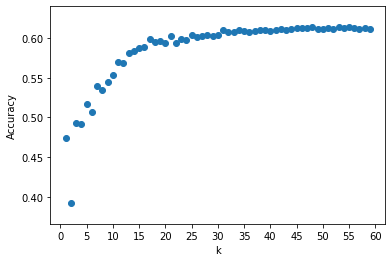

In [226]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

k_range = range(1,60)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

%matplotlib inline
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(0,65,5))

## Com padronização dos valores

([<matplotlib.axis.XTick at 0x1ea95ee8700>,
 <a list of 13 Text xticklabel objects>)

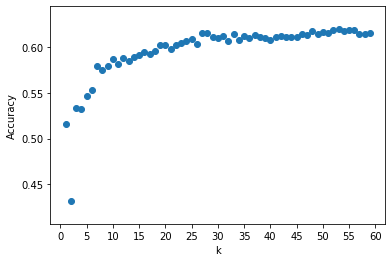

In [227]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_range = range(1,60)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

%matplotlib inline
plt.figure()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.scatter(k_range, scores)
plt.xticks(range(0,65,5))

# Suporte Vector Machine

## Sem padronização dos valores

In [228]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print('Support Vector Classifier:\n')
for gamma in [0.01, 1, 5, 10]:
    for C in [0.1, 1, 15, 250]:
        classificador = SVC(kernel = 'rbf', gamma = gamma, C = C).fit(X_train, y_train)
        print('RBF kernel, gamma = {:.2f}, C = {:.2f}, Accuracy = {:.2f}'.format(gamma, C, classificador.score(X_test, y_test)))

Support Vector Classifier:

RBF kernel, gamma = 0.01, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 0.01, C = 1.00, Accuracy = 0.61
RBF kernel, gamma = 0.01, C = 15.00, Accuracy = 0.60
RBF kernel, gamma = 0.01, C = 250.00, Accuracy = 0.60
RBF kernel, gamma = 1.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 1.00, C = 1.00, Accuracy = 0.62
RBF kernel, gamma = 1.00, C = 15.00, Accuracy = 0.62
RBF kernel, gamma = 1.00, C = 250.00, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 1.00, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 15.00, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 250.00, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 1.00, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 15.00, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 250.00, Accuracy = 0.62


In [229]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C = [1, 5, 10, 15, 100, 250]

print('Support Vector Classifier:\n')
for i in C:
    svc = LinearSVC(C=i, random_state=0).fit(X_train, y_train)
    print('Linear kernel, C = {:.2f}, Accuracy = {:.2f}'.format(i, svc.score(X_test, y_test)))

Support Vector Classifier:

Linear kernel, C = 1.00, Accuracy = 0.33
Linear kernel, C = 5.00, Accuracy = 0.38
Linear kernel, C = 10.00, Accuracy = 0.38
Linear kernel, C = 15.00, Accuracy = 0.38
Linear kernel, C = 100.00, Accuracy = 0.38
Linear kernel, C = 250.00, Accuracy = 0.38


## Com padronização dos valores

In [230]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Support Vector Classifier:\n')
for gamma in [0.01, 1, 5, 10]:
    for C in [0.1, 1, 15, 250]:
        classificador = SVC(kernel = 'rbf', gamma = gamma, C = C).fit(X_train_scaled, y_train)
        print('RBF kernel, gamma = {:.2f}, C = {:.2f}, Accuracy = {:.2f}'.format(gamma, C, classificador.score(X_test_scaled, y_test)))

Support Vector Classifier:

RBF kernel, gamma = 0.01, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 0.01, C = 1.00, Accuracy = 0.62
RBF kernel, gamma = 0.01, C = 15.00, Accuracy = 0.62
RBF kernel, gamma = 0.01, C = 250.00, Accuracy = 0.61
RBF kernel, gamma = 1.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 1.00, C = 1.00, Accuracy = 0.61
RBF kernel, gamma = 1.00, C = 15.00, Accuracy = 0.58
RBF kernel, gamma = 1.00, C = 250.00, Accuracy = 0.52
RBF kernel, gamma = 5.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 5.00, C = 1.00, Accuracy = 0.61
RBF kernel, gamma = 5.00, C = 15.00, Accuracy = 0.54
RBF kernel, gamma = 5.00, C = 250.00, Accuracy = 0.51
RBF kernel, gamma = 10.00, C = 0.10, Accuracy = 0.62
RBF kernel, gamma = 10.00, C = 1.00, Accuracy = 0.61
RBF kernel, gamma = 10.00, C = 15.00, Accuracy = 0.55
RBF kernel, gamma = 10.00, C = 250.00, Accuracy = 0.54


In [231]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C = [1, 5, 10, 15, 100, 250]

print('Support Vector Classifier:\n')
for i in C:
    svc = LinearSVC(C=i, random_state=0).fit(X_train_scaled, y_train)
    print('Linear kernel, C = {:.2f}, Accuracy = {:.2f}'.format(i, svc.score(X_test_scaled, y_test)))

Support Vector Classifier:

Linear kernel, C = 1.00, Accuracy = 0.61
Linear kernel, C = 5.00, Accuracy = 0.62
Linear kernel, C = 10.00, Accuracy = 0.62
Linear kernel, C = 15.00, Accuracy = 0.62
Linear kernel, C = 100.00, Accuracy = 0.61
Linear kernel, C = 250.00, Accuracy = 0.62


# Naive Bayes

In [232]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

classificador_NB = GaussianNB().fit(X_train, y_train)
print(classificador_NB.score(X_test, y_test))

0.5491228070175439


# Decision Tree

In [233]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

depths = [2,3,4,5,6,7,8,9,10]

print("Decision Tree:")
for i in depths:
    classificador = DecisionTreeClassifier(max_depth=i, random_state=0).fit(X_train, y_train)
    print("\nCom número máximo de ramos igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Treino".format(i, classificador.score(X_train, y_train)))
    print("Com número máximo de ramos igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Teste".format(i, classificador.score(X_test, y_test)))

Decision Tree:

Com número máximo de ramos igual a 2, nos retornou accuracy de 0.60 no conjunto de dados Treino
Com número máximo de ramos igual a 2, nos retornou accuracy de 0.62 no conjunto de dados Teste

Com número máximo de ramos igual a 3, nos retornou accuracy de 0.60 no conjunto de dados Treino
Com número máximo de ramos igual a 3, nos retornou accuracy de 0.61 no conjunto de dados Teste

Com número máximo de ramos igual a 4, nos retornou accuracy de 0.61 no conjunto de dados Treino
Com número máximo de ramos igual a 4, nos retornou accuracy de 0.62 no conjunto de dados Teste

Com número máximo de ramos igual a 5, nos retornou accuracy de 0.61 no conjunto de dados Treino
Com número máximo de ramos igual a 5, nos retornou accuracy de 0.62 no conjunto de dados Teste

Com número máximo de ramos igual a 6, nos retornou accuracy de 0.62 no conjunto de dados Treino
Com número máximo de ramos igual a 6, nos retornou accuracy de 0.61 no conjunto de dados Teste

Com número máximo de ram

# Random Forest

In [234]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

features = [2,3,4,5,6,8,10]

print("Random Forest:")
for i in features:
    classificador = RandomForestClassifier(max_features=i, random_state=0).fit(X_train, y_train)
    print("\nCom número máximo de características igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Treino".format(i, classificador.score(X_train, y_train)))
    print("Com número máximo de características igual a {}, nos retornou accuracy de {:.2f} no conjunto de dados Teste".format(i, classificador.score(X_test, y_test)))

Random Forest:

Com número máximo de características igual a 2, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 2, nos retornou accuracy de 0.62 no conjunto de dados Teste

Com número máximo de características igual a 3, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 3, nos retornou accuracy de 0.61 no conjunto de dados Teste

Com número máximo de características igual a 4, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 4, nos retornou accuracy de 0.61 no conjunto de dados Teste

Com número máximo de características igual a 5, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de características igual a 5, nos retornou accuracy de 0.61 no conjunto de dados Teste

Com número máximo de características igual a 6, nos retornou accuracy de 1.00 no conjunto de dados Treino
Com número máximo de caracterí

# K-Means

In [235]:
from sklearn.cluster import KMeans

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

k_means = KMeans(n_clusters=3, random_state=0).fit(X_train)
predicted = k_means.predict(X_train)

df_teste = pd.DataFrame(data = predicted, index=y_train)
df_teste.reset_index(inplace=True)

df_teste.replace({'Normal':1, 'Ajudado posicionado':0, 'Ajudado difícil':2}, inplace=True)
tam2 = df_teste.shape[0]
tam1 = df_teste[df_teste['Situação do parto'] == df_teste[0]].shape[0]

print('Acurácia nos dados de treino {:.2f}'.format(tam1/tam2))

Acurácia nos dados de treino 0.35


# Foi possível verificar que nenhum dos teste apresentados nos retornou um bom resultado em relação a acurácia do teste, mesmo imputando a média de cada variável. Portanto, agora iremos trabalhar com o terceiro método para tratativas dos missing values.

## Terceiro método: Predizer valores para os missing values;

In [236]:
dados.shape

(9120, 28)

In [237]:
df3 = dados.copy()

## Utilizarei método de Regressão linear para predizer valores numéricos

In [238]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9120 entries, 0 to 9119
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Situação do parto       9120 non-null   object 
 1   Bezerro deste parto     9120 non-null   object 
 2   Tipo de prenhez         9120 non-null   object 
 3   ECC                     8938 non-null   float64
 4   Multiparidade           9119 non-null   object 
 5   IPC (mês)               7469 non-null   float64
 6   PS (mês)                7469 non-null   float64
 7   IEP (mês)               9112 non-null   float64
 8   Nº SC                   9120 non-null   int64  
 9   PA (kg/L/lactação)      8256 non-null   float64
 10  PMD (kg/L/dia)          8256 non-null   float64
 11  PLMD (4%G) (kg/L/dias)  4354 non-null   float64
 12  DEL (dias)              8256 non-null   float64
 13  PAT (kg/L/lactação)     8218 non-null   float64
 14  PMDT (kg/L/dia)         8218 non-null   

### ECC

In [249]:
from sklearn.linear_model import LinearRegression

df3_teste = df3[df3['ECC'].isnull()].copy()

df3_train = df3.copy()
df3_train.dropna(inplace=True)

# Criando variáveis Dummies para o X_train
df3_train = pd.get_dummies(df3_train, columns=["Situação do parto", "Bezerro deste parto", "Tipo de prenhez", "Multiparidade", "Estações do ano"], drop_first=True)
df3_teste = pd.get_dummies(df3_teste, columns=["Situação do parto", "Bezerro deste parto", "Tipo de prenhez", "Multiparidade", "Estações do ano"], drop_first=True)

y_train = df3_train['ECC']
X_train = df3_train.drop('ECC', axis=1)
X_teste = df3_teste.drop('ECC', axis=1)

modelo = LinearRegression().fit(X_train, y_train)

#y_pred = modelo.predict(X_teste)
#y_pred

In [250]:
X_teste

,IPC (mês),PS (mês),IEP (mês),Nº SC,PA (kg/L/lactação),PMD (kg/L/dia),PLMD (4%G) (kg/L/dias),DEL (dias),PAT (kg/L/lactação),PMDT (kg/L/dia),...,Tipo de prenhez_TE/FIV,Multiparidade_quarta,Multiparidade_quinta,Multiparidade_segunda,Multiparidade_sexta,Multiparidade_sextima,Multiparidade_terceira,Estações do ano_outono,Estações do ano_primavera,Estações do ano_verão
8,2.866667,2.866667,NaN,1,3687.116,36.871,NaN,100.000434,61658.363,34.216,...,0,0,0,0,1,0,0,1,0,0
22,1.966667,4.666667,17.0,7,3355.695,18.437,NaN,182.008732,46771.185,23.887,...,1,1,0,0,0,0,0,0,0,0
71,1.800000,6.466667,28.2,12,10511.040,42.383,NaN,248.001321,53144.074,27.323,...,0,1,0,0,0,0,0,0,0,0
132,1.900000,17.433333,NaN,7,17145.168,32.471,NaN,528.014782,57287.523,30.310,...,1,0,1,0,0,0,0,1,0,0
161,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,60435.672,25.615,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8793,NaN,NaN,0.0,2,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
8802,NaN,NaN,0.0,2,7887.931,27.872,21.517184,283.005561,7887.931,27.872,...,0,0,0,0,0,0,0,1,0,0
8808,1.400000,6.166667,0.0,2,14221.704,43.759,47.500395,325.000663,14221.704,43.759,...,0,0,0,0,0,0,0,0,1,0
8843,NaN,NaN,0.0,2,21039.351,28.165,25.756892,747.003408,21039.351,28.165,...,0,0,0,0,0,0,0,0,1,0
